# トポロジカルなソート

有向非巡回グラフ(`DirectedAcyclicGraph/DAG`)に関して定義されるソート

[Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%88%E3%83%9D%E3%83%AD%E3%82%B8%E3%82%AB%E3%83%AB%E3%82%BD%E3%83%BC%E3%83%88#:~:text=%E3%83%88%E3%83%9D%E3%83%AD%E3%82%B8%E3%82%AB%E3%83%AB%E3%82%BD%E3%83%BC%E3%83%88%EF%BC%88%E8%8B%B1%3A%20topological%20sort,%E3%82%BD%E3%83%BC%E3%83%88%E3%81%99%E3%82%8B%E3%81%93%E3%81%A8%E3%81%8C%E3%81%A7%E3%81%8D%E3%82%8B%E3%80%82)

In [2]:
from graphviz import Digraph

In [8]:
dag1 = [
    [1, 2],
    [2],
    [3, 4, 5],
    [6],
    [7],
    [6, 7],
    [7],
    []
]

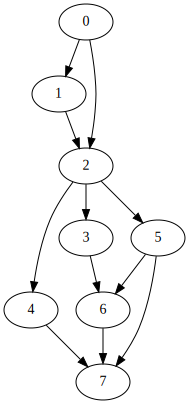

In [9]:
# 可視化してみる
dg = Digraph(format="png")

for i, n in enumerate(dag1):
    dg.node(str(i))

for i, vs in enumerate(dag1):
    for j in vs:
        dg.edge(str(i), str(j))

dg